In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Score_assignment
import Score_cluster
import Score_physics
from Plotting import *

from scipy.optimize import curve_fit

In [14]:
from Fitting import *
fitter = TrackFitter(B=1.)

In [15]:
df = pd.read_csv("result_truth_100.csv")

In [114]:
ievent = 2
iparticle=0
itrack =1999

df_event=df.loc[df['event']==ievent]
df_particle=df_event[df['particle']==iparticle]
df_track=df_event[df['track']==itrack]

In [115]:
df_event

,Unnamed: 0,event,particle,track,hit,x,y
19,19,2,2000,1999,0,-0.690865,0.465994
20,20,2,2000,1999,1,-1.103684,0.586839
21,21,2,2000,1999,2,-1.545306,0.624344
22,22,2,2000,1999,3,-1.981368,0.643785
23,23,2,2000,1999,4,-2.445369,0.519779


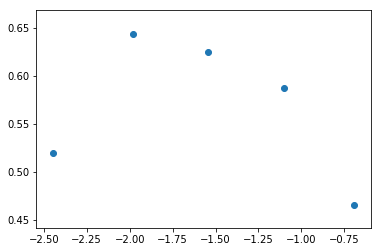

In [116]:
x=df_track['x'].values
y=df_track['y'].values

plt.scatter(x,y)
plt.show()

In [117]:
x,y

(array([-0.69086464, -1.10368449, -1.54530642, -1.98136774, -2.445369  ]),
 array([ 0.46599409,  0.58683945,  0.62434432,  0.6437854 ,  0.51977923]))

In [131]:
pt,phi,vx,vy,chg=fitter.fit(x,y)

In [132]:
pt,phi,vx,vy,chg

(96.299908048746417,
 2.8568174881945425,
 -24.999999999530512,
 -2.7668275805966056,
 1)

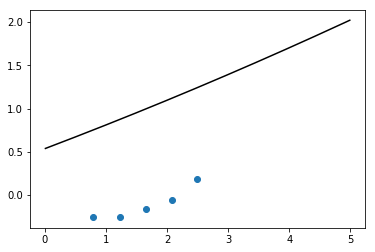

In [137]:
xr,yr,phi=rotateArrayToQuadrant(x,y)
xp=np.arange(0.01,5.,0.01)
plt.scatter(xr,yr)
plt.plot(xp,circular_path(xp,pt,vx,vy),'k')
plt.show()